In [18]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [19]:

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target



In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Define the parameter grid for pruning and advanced techniques
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5,7, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform Grid Search to optimize hyperparameters
rf = RandomForestClassifier(random_state=46)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=46), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [21]:

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.2f}")
print(f"Best Parameters: {grid_search.best_params_}")



Best Model Accuracy: 0.90
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [27]:
# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)
print(indices)

[0.10589279 0.03014727 0.44061979 0.42334016]
[2 3 0 1]


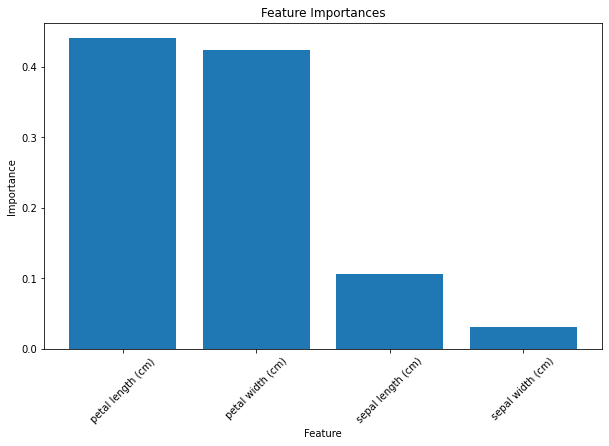

In [24]:

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()